In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers,layers,Model
from tensorflow.keras.datasets import mnist
from keras.layers import BatchNormalization, MaxPooling2D, Dropout
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data() # Loading the data (np array)
X_train = X_train.reshape(-1,28,28,1).astype('float32')/255.0 # resizing the data and normalizing it to ease the compuation
X_test = X_test.reshape(-1,28,28,1).astype('float32') /255.0 # resizing the data and normalizing it to ease the compuation
# Printing the shapes
print("Shape of X_train : {}".format(X_train.shape))
print("Shape of y_train : {}".format(y_train.shape))
print("Shape of X_test  : {}".format(X_test.shape))
print("Shape of y_test  : {}".format(y_test.shape))

11493376/11490434 [==============================] - 0s 0us/step
Shape of X_train : (60000, 28, 28, 1)
Shape of y_train : (60000,)
Shape of X_test  : (10000, 28, 28, 1)
Shape of y_test  : (10000,)


In [ ]:
# # Taking look at some of the examples
# for i in range(9):
#     plt.subplot(330+1+i)
#     plt.imshow(X_train[i],cmap=plt.get_cmap('gray'))
# plt.show()

In [ ]:
# Creating Model using Funtional Keras API
def myModel():
    inputs = keras.Input(shape=(28,28,1))
    # First Layer
    X1 = keras.layers.Conv2D(32,(3,3),padding = 'same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(inputs)  
    X1 = keras.activations.relu(X1)
    X1 = keras.layers.MaxPooling2D((2,2))(X1)
    # Second Layer
    X2 = keras.layers.Conv2D(64,(3,3),padding = 'same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(X1)  
    X2 = keras.activations.relu(X2)
    X2 = keras.layers.MaxPooling2D((2,2))(X2)
    # Third Layer
    X3 = keras.layers.Conv2D(128,(5,5),padding = 'same',kernel_initializer='he_normal',kernel_regularizer=regularizers.l2(0.001))(X2)  
    X3 = keras.activations.relu(X3)
    X3 = keras.layers.MaxPooling2D((2,2))(X3)
    # Flatten
    X4 = keras.layers.Flatten()(X3)
    # Dense Layers (Third Layer)
    X5 = keras.layers.Dense(100,activation='relu')(X4)
    X5 = keras.layers.Dropout(0.4)(X5)
    # Fourth Layer
    outputs = keras.layers.Dense(10,activation='softmax')(X5)
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    
    return model

In [ ]:
'''
model = keras.models.load_model('saved_model')
model.summary()
'''

"\nmodel = keras.models.load_model('saved_model')\nmodel.summary()\n"

In [ ]:
# Creating a model
model = myModel()
model.compile(
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy'],
    optimizer = keras.optimizers.Adam(lr=3e-4) 
        )
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
tf.nn.relu (TFOpLambda)      (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
tf.nn.relu_1 (TFOpLambda)    (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0     

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
# Training model
history = model.fit(X_train,y_train,epochs=50,batch_size=64,verbose=1)

Epoch 1/50
938/938 [==============================] - 36s 5ms/step - loss: 0.7203 - accuracy: 0.8997
Epoch 2/50
938/938 [==============================] - 4s 5ms/step - loss: 0.4041 - accuracy: 0.9713
Epoch 3/50
938/938 [==============================] - 4s 5ms/step - loss: 0.3072 - accuracy: 0.9785
Epoch 4/50
938/938 [==============================] - 4s 5ms/step - loss: 0.2403 - accuracy: 0.9829
Epoch 5/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1907 - accuracy: 0.9847
Epoch 6/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1566 - accuracy: 0.9864
Epoch 7/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1335 - accuracy: 0.9877
Epoch 8/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1178 - accuracy: 0.9883
Epoch 9/50
938/938 [==============================] - 4s 5ms/step - loss: 0.1068 - accuracy: 0.9884
Epoch 10/50
938/938 [==============================] - 4s 5ms/step - loss: 0.0954 - accuracy: 0.990

In [ ]:
model.evaluate(X_test,y_test,batch_size=64,verbose=1)

157/157 [==============================] - 1s 3ms/step - loss: 0.0479 - accuracy: 0.9929


[0.04788747429847717, 0.992900013923645]

In [ ]:
# !mkdir -p saved_model

In [ ]:
# Saving model and weights
model.save("model.h5")

In [ ]:
model.save("saved_model")

INFO:tensorflow:Assets written to: saved_model/assets


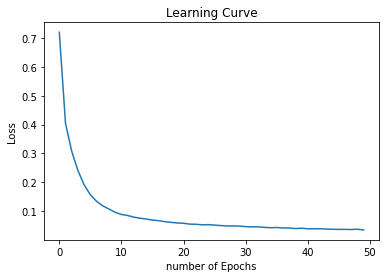

In [ ]:
# Plotting the learning curve
loss = history.history['loss']
epochs = history.epoch 
plt.plot(epochs,loss)
plt.xlabel('number of Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.show
plt.savefig('LearningCurve.png', dpi=300, bbox_inches='tight')

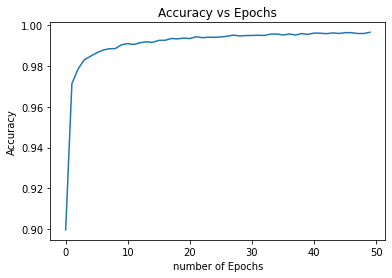

In [ ]:
# Plotting the Accuracy curve
acc = history.history['accuracy']
epochs = history.epoch 
plt.plot(epochs,acc)
plt.xlabel('number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.show
plt.savefig('AccuracyCurve.png', dpi=300, bbox_inches='tight')

In [ ]:
!apt-get install zip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
zip is already the newest version (3.0-11build1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


In [ ]:
!zip -r saved_model.zip saved_model

  adding: saved_model/ (stored 0%)
  adding: saved_model/keras_metadata.pb (deflated 91%)
  adding: saved_model/variables/ (stored 0%)
  adding: saved_model/variables/variables.index (deflated 66%)
  adding: saved_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: saved_model/saved_model.pb (deflated 89%)
  adding: saved_model/assets/ (stored 0%)
